In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018/2018-07-btc-krw.csv")

In [3]:
df.dtypes # identifying column type

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [5]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [6]:
## creating 'hour - amount' connection
group_hour_amount = df['amount'].groupby(df['timestamp_hour'])

In [7]:
## 시간별 transaction 수
group_hour_amount.size()

timestamp_hour
0     355
1     322
2     264
3     356
4     344
5     310
6     311
7     494
8     581
9     501
10    395
11    398
12    394
13    258
14    329
15    427
16    383
17    305
18    453
19    413
20    404
21    448
22    525
23    497
Name: amount, dtype: int64

In [8]:
## 시간별 총 sell - buy
group_hour_amount.sum()

timestamp_hour
0    -30622562
1    -24689234
2     84809670
3    -51899767
4    -41743148
5     40507329
6      3710915
7     83558729
8    -77297664
9    -13141046
10     -615788
11   -17819833
12    71550692
13   -16613900
14    42069183
15   -59741580
16    37204005
17    14118124
18   -40325895
19    12237878
20    15691774
21   -62389604
22   -52736975
23    84672846
Name: amount, dtype: int64

In [9]:
## creating 'hourly - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_hour_amount_positive = df2['amount'].groupby(df2['timestamp_hour'])

In [10]:
# 시간별 sell transaction 수 (positive)
group_hour_amount_positive.size()

timestamp_hour
0     204
1     176
2     161
3     199
4     198
5     177
6     148
7     322
8     320
9     289
10    225
11    188
12    225
13    136
14    196
15    247
16    221
17    207
18    208
19    199
20    207
21    254
22    270
23    270
Name: amount, dtype: int64

In [11]:
# 시간별 sell 총합
group_hour_amount_positive.sum()

timestamp_hour
0     476843906
1     412028175
2     316020865
3     323423511
4     382848437
5     280619296
6     240346936
7     715535858
8     681989190
9     620094470
10    484981132
11    476877889
12    434156132
13    296334595
14    296626452
15    496584583
16    440816537
17    389035299
18    526345765
19    521904446
20    568654665
21    617584697
22    879994217
23    742943228
Name: amount, dtype: int64

In [12]:
## creating 'hour - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_hour_amount_negative = df3['amount'].groupby(df3['timestamp_hour'])

In [13]:
# 시간별 buy transaction 수
group_hour_amount_negative.size()

timestamp_hour
0     151
1     146
2     103
3     157
4     146
5     133
6     163
7     172
8     261
9     212
10    170
11    210
12    169
13    122
14    133
15    180
16    162
17     98
18    245
19    214
20    197
21    194
22    255
23    227
Name: amount, dtype: int64

In [14]:
# 시간별 buy 총합
group_hour_amount_negative.sum()

timestamp_hour
0    -507466468
1    -436717409
2    -231211195
3    -375323278
4    -424591585
5    -240111967
6    -236636021
7    -631977129
8    -759286854
9    -633235516
10   -485596920
11   -494697722
12   -362605440
13   -312948495
14   -254557269
15   -556326163
16   -403612532
17   -374917175
18   -566671660
19   -509666568
20   -552962891
21   -679974301
22   -932731192
23   -658270382
Name: amount, dtype: int64

In [15]:
# 시간별 절대값 총합
# negative는 buy
absolute_negative_sum = group_hour_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
# total 은 sell - buy
absolute_total_amount = absolute_negative_sum+group_hour_amount_positive.sum()
absolute_total_amount

timestamp_hour
0      984310374
1      848745584
2      547232060
3      698746789
4      807440022
5      520731263
6      476982957
7     1347512987
8     1441276044
9     1253329986
10     970578052
11     971575611
12     796761572
13     609283090
14     551183721
15    1052910746
16     844429069
17     763952474
18    1093017425
19    1031571014
20    1121617556
21    1297558998
22    1812725409
23    1401213610
Name: amount, dtype: int64

In [16]:
## 시간별 계산 table 생성
dfs = [group_hour_amount.size(), group_hour_amount.sum(), group_hour_amount_positive.size(), group_hour_amount_positive.sum(), group_hour_amount_negative.size(), group_hour_amount_negative.sum(), absolute_total_amount, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_hour'), dfs)
day_df_final.columns = [ "Hourly transaction", "Hourly sell-buy", "Hourly sell transaction", "Hourly sell", "Hourly buy transaction", "Hourly buy", "Hourly total sell", "Hourly absolute total buy"]
day_df_final

,Hourly transaction,Hourly sell-buy,Hourly sell transaction,Hourly sell,Hourly buy transaction,Hourly buy,Hourly total sell,Hourly absolute total buy
timestamp_hour,,,,,,,,
0,355,-30622562,204,476843906,151,-507466468,984310374,507466468
1,322,-24689234,176,412028175,146,-436717409,848745584,436717409
2,264,84809670,161,316020865,103,-231211195,547232060,231211195
3,356,-51899767,199,323423511,157,-375323278,698746789,375323278
4,344,-41743148,198,382848437,146,-424591585,807440022,424591585
5,310,40507329,177,280619296,133,-240111967,520731263,240111967
6,311,3710915,148,240346936,163,-236636021,476982957,236636021
7,494,83558729,322,715535858,172,-631977129,1347512987,631977129
8,581,-77297664,320,681989190,261,-759286854,1441276044,759286854


In [17]:
day_df_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/hour_result_table_2018_07.csv", header=True, index=True, encoding = 'utf-8')

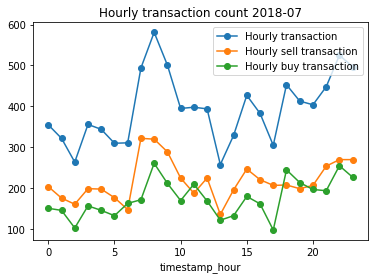

In [18]:
day_df_final[['Hourly transaction', 'Hourly sell transaction', 'Hourly buy transaction']].plot(title='Hourly transaction count 2018-07', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count_2018_07.png', dpi=300)

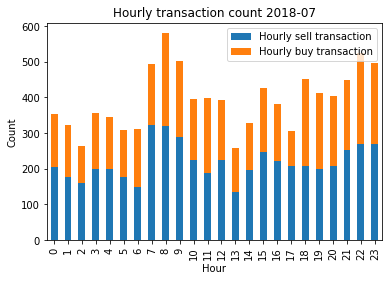

In [19]:
hourTransGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count 2018-07', stacked=True)
hourTransGraph.set_xlabel('Hour')
hourTransGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Stacked)_2018_07.png', dpi=300)

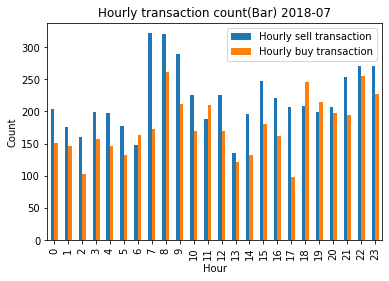

In [20]:
hourTransBarGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count(Bar) 2018-07')
hourTransBarGraph.set_xlabel('Hour')
hourTransBarGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Bar)_2018_07.png', dpi=300)

In [21]:
# Minute
## creating 'minute - amount' connection
group_minute_amount = df['amount'].groupby(df['timestamp_minute'])

In [22]:
# Date
# Creating 'date - amount' connection
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [23]:
# 분 당 transaction 수
group_minute_amount.size()

timestamp_minute
0     143
1     139
2     155
3     151
4     139
5     152
6     149
7     140
8     153
9     150
10    157
11    182
12    169
13    145
14    134
15    179
16    141
17    143
18    159
19    142
20    145
21    199
22    180
23    157
24    166
25    220
26    149
27    183
28    158
29    173
30    186
31    129
32    164
33    164
34    175
35    184
36    216
37    149
38    165
39    209
40    174
41    153
42    147
43    165
44    123
45    163
46    170
47    143
48    164
49    126
50    154
51    118
52    133
53    144
54    160
55    167
56    137
57    127
58    151
59    155
Name: amount, dtype: int64

In [24]:
# date 당 transaction 수
group_date_amount.size()

timestamp_day
1     174
2     356
3     736
4     689
5     488
6     573
7     521
8     447
9     766
10    812
11    763
12    517
13    741
14    492
15    595
16    794
17      3
Name: amount, dtype: int64

In [25]:
# minute 별 sell - buy 금액
group_minute_amount.sum()

timestamp_minute
0     -58200315
1      47274364
2      18404316
3    -144383259
4     -59561430
5      -5126390
6      97673734
7     -12521751
8     -13617398
9      88504725
10     35516340
11     30272765
12     29895272
13    -95695683
14    -28286867
15    -48656368
16    105187348
17     31000765
18     20140414
19     69210181
20     29270861
21      5277998
22     29644413
23   -141313366
24    -33357911
25     18890841
26    -37054325
27    -98686464
28     23811068
29     65609599
30     34984804
31    -31858003
32    101429094
33    -19499325
34    -51265687
35    -35414894
36     81633797
37     15950818
38    -27681669
39     70551030
40    -49536935
41    107931491
42     21334017
43   -119375866
44     36272768
45   -120625581
46    -31893130
47    -62521009
48     -7239998
49     37986994
50     15281488
51      8276918
52     44756895
53    -43647249
54    -80885376
55     52811493
56    -28147955
57     38135261
58     29882205
59     43744276
Name: amount, dtype: in

In [26]:
# date 별 sell - buy 금액
group_hour_amount.sum()

timestamp_hour
0    -30622562
1    -24689234
2     84809670
3    -51899767
4    -41743148
5     40507329
6      3710915
7     83558729
8    -77297664
9    -13141046
10     -615788
11   -17819833
12    71550692
13   -16613900
14    42069183
15   -59741580
16    37204005
17    14118124
18   -40325895
19    12237878
20    15691774
21   -62389604
22   -52736975
23    84672846
Name: amount, dtype: int64

In [27]:
# creating 'minute' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_minute_amount_positive = df2['amount'].groupby(df2['timestamp_minute'])

In [28]:
# creating 'date' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [29]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0      69
1      78
2      76
3      57
4      82
5      85
6      75
7      64
8      80
9     103
10     89
11     99
12    104
13     70
14     65
15    104
16     94
17     83
18     88
19     89
20     88
21    110
22     92
23     78
24     82
25     98
26     73
27    100
28     93
29    104
30    110
31     86
32    104
33     79
34     93
35    104
36    124
37     73
38     83
39    107
40    103
41    102
42     82
43     84
44     65
45     71
46    108
47     77
48    109
49     83
50     86
51     59
52     81
53     82
54     81
55    119
56     78
57     56
58     95
59     91
Name: amount, dtype: int64

In [30]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1      89
2     194
3     413
4     380
5     273
6     315
7     281
8     229
9     467
10    431
11    442
12    280
13    433
14    307
15    295
16    416
17      2
Name: amount, dtype: int64

In [31]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0      69
1      78
2      76
3      57
4      82
5      85
6      75
7      64
8      80
9     103
10     89
11     99
12    104
13     70
14     65
15    104
16     94
17     83
18     88
19     89
20     88
21    110
22     92
23     78
24     82
25     98
26     73
27    100
28     93
29    104
30    110
31     86
32    104
33     79
34     93
35    104
36    124
37     73
38     83
39    107
40    103
41    102
42     82
43     84
44     65
45     71
46    108
47     77
48    109
49     83
50     86
51     59
52     81
53     82
54     81
55    119
56     78
57     56
58     95
59     91
Name: amount, dtype: int64

In [32]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1      89
2     194
3     413
4     380
5     273
6     315
7     281
8     229
9     467
10    431
11    442
12    280
13    433
14    307
15    295
16    416
17      2
Name: amount, dtype: int64

In [33]:
# creating 'minute - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_minute_amount_negative = df3['amount'].groupby(df3['timestamp_minute'])

In [34]:
## creating 'date - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [35]:
# minute 별 buy transaction 수
group_minute_amount_negative.size()

timestamp_minute
0      74
1      61
2      79
3      94
4      57
5      67
6      74
7      76
8      73
9      47
10     68
11     83
12     65
13     75
14     69
15     75
16     47
17     60
18     71
19     53
20     57
21     89
22     88
23     79
24     84
25    122
26     76
27     83
28     65
29     69
30     76
31     43
32     60
33     85
34     82
35     80
36     92
37     76
38     82
39    102
40     71
41     51
42     65
43     81
44     58
45     92
46     62
47     66
48     55
49     43
50     68
51     59
52     52
53     62
54     79
55     48
56     59
57     71
58     56
59     64
Name: amount, dtype: int64

In [36]:
# date 별 buy transaction 수
group_date_amount_negative.size()

timestamp_day
1      85
2     162
3     323
4     309
5     215
6     258
7     240
8     218
9     299
10    381
11    321
12    237
13    308
14    185
15    300
16    378
17      1
Name: amount, dtype: int64

In [37]:
# minute 별 buy 총합
group_minute_amount_negative.sum()

timestamp_minute
0    -189396375
1    -122844943
2    -173030017
3    -246880305
4    -244478919
5    -222308670
6    -134485420
7    -155106603
8    -191562197
9    -115652818
10   -142097310
11   -239735415
12   -203811558
13   -263238393
14   -229904555
15   -248374416
16    -84528108
17   -127352374
18   -145528964
19   -133074975
20   -135627545
21   -215214678
22   -218478392
23   -255903340
24   -226877295
25   -278479966
26   -212773283
27   -306721743
28   -202104876
29   -166037341
30   -260710773
31   -168973785
32   -166665414
33   -188504343
34   -190895307
35   -230822181
36   -220930548
37   -209661853
38   -228157378
39   -224067232
40   -201519837
41   -169214042
42   -174951675
43   -286949880
44   -145227630
45   -294886340
46   -247693452
47   -201462182
48   -213800222
49   -120981025
50   -171356958
51    -95365388
52   -151966038
53   -223461864
54   -206656939
55   -144278296
56   -166460724
57   -114227365
58   -199752876
59   -170883791
Name: amount, dtype: in

In [38]:
# daye 별 buy 총합
group_date_amount_negative.sum()

timestamp_day
1     -173409291
2     -425904477
3     -877799570
4     -714107244
5     -461245187
6     -539752948
7     -554755129
8     -705278311
9    -1176028215
10   -1112302940
11    -863520961
12    -782974573
13    -813778787
14    -546962221
15    -677676398
16   -1196497228
17       -102652
Name: amount, dtype: int64

In [39]:
# minute 별 절대값 총합
# negative는 buy
absolute_minute_negative_sum = group_minute_amount_negative.sum()
absolute_minute_negative_sum = absolute_minute_negative_sum * (-1)
# total 은 sell - buy
absolute_minute_total_amount = absolute_minute_negative_sum+group_minute_amount_positive.sum()
absolute_minute_total_amount

timestamp_minute
0     320592435
1     292964250
2     364464350
3     349377351
4     429396408
5     439490950
6     366644574
7     297691455
8     369506996
9     319810361
10    319710960
11    509743595
12    437518388
13    430781103
14    431522243
15    448092464
16    274243564
17    285705513
18    311198342
19    335360131
20    300525951
21    435707354
22    466601197
23    370493314
24    420396679
25    575850773
26    388492241
27    514757022
28    428020820
29    397684281
30    556406350
31    306089567
32    434759922
33    357509361
34    330524927
35    426229468
36    523494893
37    435274524
38    428633087
39    518685494
40    353502739
41    446359575
42    371237367
43    454523894
44    326728028
45    469147099
46    463493774
47    340403355
48    420360446
49    279949044
50    357995404
51    199007694
52    348688971
53    403276479
54    332428502
55    341368085
56    304773493
57    266589991
58    429387957
59    385511858
Name: amount, dtype: in

In [40]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total 은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount

timestamp_day
1      332233212
2      866976970
3     1755766966
4     1409221482
5      941947326
6     1057734742
7     1116354922
8     1425871853
9     2339370485
10    2215535773
11    1745363933
12    1549419756
13    1627665593
14    1091471433
15    1359579172
16    2407638973
17       2533822
Name: amount, dtype: int64

In [41]:
# minute 별 계산 table 생성
dfs = [group_minute_amount.size(), group_minute_amount.sum(), group_minute_amount_positive.size(), group_minute_amount_positive.sum(), group_minute_amount_negative.size(), group_minute_amount_negative.sum(), absolute_minute_total_amount, absolute_minute_negative_sum]
day_df_minute_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_minute'), dfs)
day_df_minute_final.columns = [ "Minute transaction", "Minute sell-buy", "Minute sell transaction", "Minute sell", "Minute buy transaction", "Minute buy", "Minute total sell", "Minute absolute total buy"]
day_df_minute_final

,Minute transaction,Minute sell-buy,Minute sell transaction,Minute sell,Minute buy transaction,Minute buy,Minute total sell,Minute absolute total buy
timestamp_minute,,,,,,,,
0,143,-58200315,69,131196060,74,-189396375,320592435,189396375
1,139,47274364,78,170119307,61,-122844943,292964250,122844943
2,155,18404316,76,191434333,79,-173030017,364464350,173030017
3,151,-144383259,57,102497046,94,-246880305,349377351,246880305
4,139,-59561430,82,184917489,57,-244478919,429396408,244478919
5,152,-5126390,85,217182280,67,-222308670,439490950,222308670
6,149,97673734,75,232159154,74,-134485420,366644574,134485420
7,140,-12521751,64,142584852,76,-155106603,297691455,155106603
8,153,-13617398,80,177944799,73,-191562197,369506996,191562197


In [42]:
# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_total_amount, absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date total sell", "Date absolute total buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date total sell,Date absolute total buy
timestamp_day,,,,,,,,
1,174,-14585370,89,158823921,85,-173409291,332233212,173409291
2,356,15168016,194,441072493,162,-425904477,866976970,425904477
3,736,167826,413,877967396,323,-877799570,1755766966,877799570
4,689,-18993006,380,695114238,309,-714107244,1409221482,714107244
5,488,19456952,273,480702139,215,-461245187,941947326,461245187
6,573,-21771154,315,517981794,258,-539752948,1057734742,539752948
7,521,6844664,281,561599793,240,-554755129,1116354922,554755129
8,447,15315231,229,720593542,218,-705278311,1425871853,705278311
9,766,-12685945,467,1163342270,299,-1176028215,2339370485,1176028215


In [43]:
# table 저장하기
day_df_minute_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/minute_result_table_2018_07.csv", header=True, index=True, encoding = 'utf-8')

In [44]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table_2018_07.csv", header=True, index=True, encoding = 'utf-8')

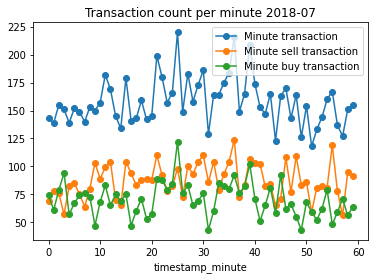

In [45]:
# Minute - transaction 그래프 그리기
day_df_minute_final[['Minute transaction', 'Minute sell transaction', 'Minute buy transaction']].plot(title='Transaction count per minute 2018-07', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute_2018_07.png', dpi=300)

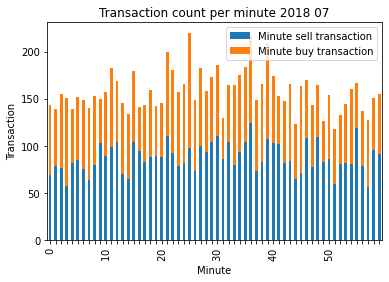

In [46]:
minuteTransGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute 2018 07', stacked=True)
minuteTransGraph.set_xlabel('Minute')
minuteTransGraph.set_ylabel('Transaction')
minuteTransGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Stacked)_2018_07.png', dpi=300)

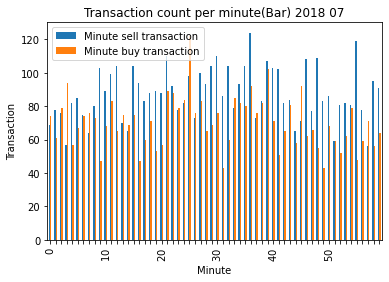

In [47]:
minuteTransBarGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute(Bar) 2018 07')
minuteTransBarGraph.set_xlabel('Minute')
minuteTransBarGraph.set_ylabel('Transaction')
minuteTransBarGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Bar)_2018_07.png', dpi=300)

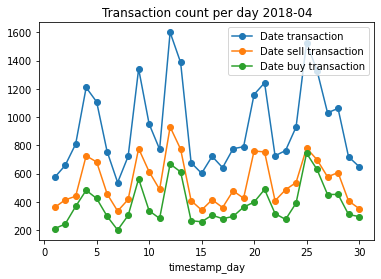

In [48]:
# Date - transaction 그래프 그리기
day_df_date_final[['Date transaction', 'Date sell transaction', 'Date buy transaction']].plot(title='Transaction count per day 2018-04', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day_2018_04.png', dpi=300)

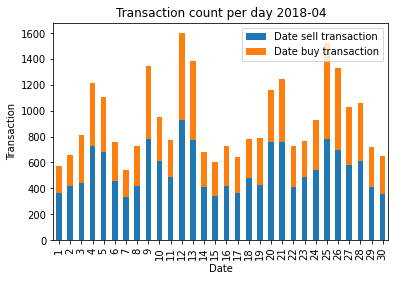

In [49]:
dayTransGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day 2018-04', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Stacked)_2018_04.png', dpi=300)

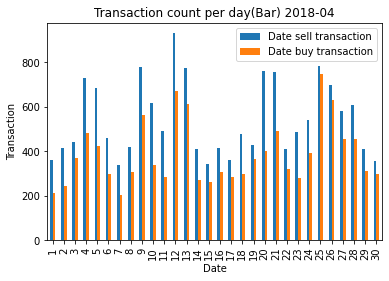

In [50]:
dayTransBarGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day(Bar) 2018-04')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Bar)_2018_04.png', dpi=300)